## Import Packages 

In [1]:
from data import shortestpath, dataset
from model import shortestPathModel
from twostage import sklearnPred
from evalm import calUnambSPO

In [2]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Build Optimizer

In [3]:
# model for shortest path
grid = (5,5)
sp_model = shortestPathModel(grid)

Academic license - for non-commercial use only - expires 2021-06-13
Using license file C:\Users\Apocrypse\gurobi.lic


## Build Predictor

In [4]:
# linear regression
lr = LinearRegression()
lr_twostage = sklearnPred(lr, sp_model)

In [5]:
# random forest
rf = RandomForestRegressor(random_state=135)
rf_twostage = sklearnPred(rf, sp_model)

## Experiments

### Training Set Size = 100, Noise Half−width = 0 

In [6]:
# set up
n = 100 # number of data
p = 5 # size of feature
e = 0 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [7]:
# init DataFrame
df1_lr = pd.DataFrame(columns = degs)
df1_rf = pd.DataFrame(columns = degs)

In [8]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df1_lr = df1_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 417.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.79it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 303.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.01it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.09it/s]


Normalized SPO Loss: 0.14%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.78it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.35it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.71it/s]


Normalized SPO Loss: 1.89%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 484.41it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 436.42it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.53it/s]


Normalized SPO Loss: 6.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 426.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 443.39it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.71it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 384.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.18it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.19it/s]


Normalized SPO Loss: 0.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 470.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 454.58it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.92it/s]


Normalized SPO Loss: 1.44%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 388.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 420.45it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.85it/s]


Normalized SPO Loss: 5.82%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 359.98it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.11it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.68it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.37it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.70it/s]


Normalized SPO Loss: 2.30%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 316.14it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.16it/s]


Normalized SPO Loss: 10.34%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 260.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.67it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 410.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.29it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.84it/s]


Normalized SPO Loss: 0.21%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 410.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.60it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.11it/s]


Normalized SPO Loss: 3.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 344.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.54it/s]


Normalized SPO Loss: 9.93%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 295.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.14it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.17it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.75it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.33it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.62it/s]


Normalized SPO Loss: 0.15%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 329.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.97it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.84it/s]


Normalized SPO Loss: 2.19%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 311.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.24it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.85it/s]


Normalized SPO Loss: 7.85%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 366.68it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.72it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.46it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 391.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.77it/s]


Normalized SPO Loss: 0.19%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 300.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.96it/s]


Normalized SPO Loss: 2.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 352.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.07it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.46it/s]


Normalized SPO Loss: 9.07%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 378.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 389.79it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.32it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 374.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.03it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.94it/s]


Normalized SPO Loss: 0.10%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 342.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 419.96it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.27it/s]


Normalized SPO Loss: 1.48%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 485.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 404.73it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.08it/s]


Normalized SPO Loss: 4.98%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.40it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.87it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.56it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 300.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.87it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 279.42it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.69it/s]


Normalized SPO Loss: 2.94%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 246.11it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.86it/s]


Normalized SPO Loss: 9.95%



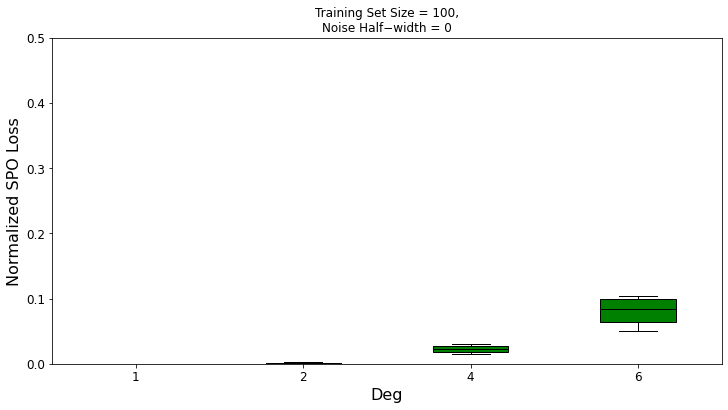

In [9]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df1_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0')
plt.show()

In [10]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df1_rf = df1_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.80it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 282.71it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.63it/s]


Normalized SPO Loss: 0.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 462.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 429.35it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.46it/s]


Normalized SPO Loss: 1.95%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 409.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.39it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.84it/s]


Normalized SPO Loss: 4.95%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 316.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.95it/s]


Normalized SPO Loss: 10.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.83it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.13it/s]


Normalized SPO Loss: 0.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 419.53it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.79it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.54it/s]


Normalized SPO Loss: 1.69%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.42it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.33it/s]


Normalized SPO Loss: 5.01%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 336.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.96it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.51it/s]


Normalized SPO Loss: 12.35%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 371.30it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.78it/s]


Normalized SPO Loss: 0.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 405.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.27it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.00it/s]


Normalized SPO Loss: 1.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 390.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 351.85it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.55it/s]


Normalized SPO Loss: 4.72%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.24it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.57it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.72it/s]


Normalized SPO Loss: 11.46%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.62it/s]


Normalized SPO Loss: 0.70%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.29it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.61it/s]


Normalized SPO Loss: 1.72%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 243.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 293.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.09it/s]


Normalized SPO Loss: 6.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.83it/s]


Normalized SPO Loss: 14.39%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 234.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 261.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.62it/s]


Normalized SPO Loss: 0.53%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 244.85it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 277.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.60it/s]


Normalized SPO Loss: 1.29%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.22it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.15it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.31it/s]


Normalized SPO Loss: 3.99%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 269.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 246.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.45it/s]


Normalized SPO Loss: 11.25%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 274.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 259.69it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 66.76it/s]


Normalized SPO Loss: 0.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 162.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 238.63it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.61it/s]


Normalized SPO Loss: 1.81%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 328.75it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.30it/s]


Normalized SPO Loss: 5.03%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 264.83it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.12it/s]


Normalized SPO Loss: 11.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 251.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 238.92it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.44it/s]


Normalized SPO Loss: 0.56%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 269.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.90it/s]


Normalized SPO Loss: 1.37%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 266.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 274.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.00it/s]


Normalized SPO Loss: 5.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 257.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 236.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.80it/s]


Normalized SPO Loss: 10.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 221.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 258.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.29it/s]


Normalized SPO Loss: 0.64%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 252.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 209.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.11it/s]


Normalized SPO Loss: 1.62%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 254.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.75it/s]


Normalized SPO Loss: 4.71%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 269.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 270.72it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.73it/s]


Normalized SPO Loss: 10.56%



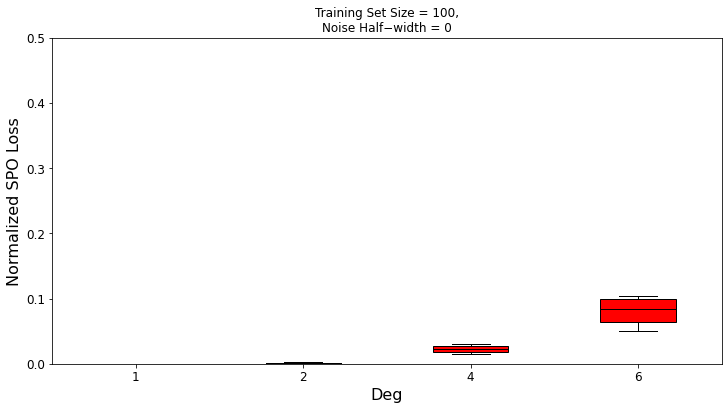

In [11]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df1_lr, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0')
plt.show()

### Training Set Size = 100, Noise Half−width = 0.5 

In [12]:
# set up
n = 100 # number of data
p = 5 # size of feature
e = 0.5 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [13]:
# init DataFrame
df2_lr = pd.DataFrame(columns = degs)
df2_rf = pd.DataFrame(columns = degs)

In [14]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df2_lr = df2_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 239.75it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.36it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.03it/s]


Normalized SPO Loss: 16.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 266.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 280.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.28it/s]


Normalized SPO Loss: 10.93%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.92it/s]


Normalized SPO Loss: 8.79%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 226.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 233.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.68it/s]


Normalized SPO Loss: 12.20%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 270.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 259.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.03it/s]


Normalized SPO Loss: 15.90%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 236.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 239.93it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.76it/s]


Normalized SPO Loss: 10.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.18it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 265.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.38it/s]


Normalized SPO Loss: 6.91%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 336.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.93it/s]


Normalized SPO Loss: 9.41%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 342.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.67it/s]


Normalized SPO Loss: 18.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 254.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 263.91it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.94it/s]


Normalized SPO Loss: 12.84%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.87it/s]


Normalized SPO Loss: 11.15%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.97it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.73it/s]


Normalized SPO Loss: 17.25%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.51it/s]


Normalized SPO Loss: 17.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 411.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.71it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.72it/s]


Normalized SPO Loss: 12.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.85it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.25it/s]


Normalized SPO Loss: 10.42%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 406.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 398.76it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.85it/s]


Normalized SPO Loss: 16.17%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.54it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.17it/s]


Normalized SPO Loss: 17.55%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 403.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.51it/s]


Normalized SPO Loss: 12.51%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 237.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.44it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.16it/s]


Normalized SPO Loss: 9.34%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.34it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.11it/s]


Normalized SPO Loss: 13.14%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.29it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.77it/s]


Normalized SPO Loss: 16.36%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.71it/s]


Normalized SPO Loss: 10.77%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 281.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.39it/s]


Normalized SPO Loss: 8.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 247.96it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.48it/s]


Normalized SPO Loss: 13.76%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 290.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 238.37it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.62it/s]


Normalized SPO Loss: 16.40%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 233.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.99it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.43it/s]


Normalized SPO Loss: 11.23%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.69it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.22it/s]


Normalized SPO Loss: 8.87%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.10it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.85it/s]


Normalized SPO Loss: 13.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 258.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.39it/s]


Normalized SPO Loss: 16.23%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.98it/s]


Normalized SPO Loss: 10.90%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 256.97it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.07it/s]


Normalized SPO Loss: 10.88%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 293.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 276.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.08it/s]


Normalized SPO Loss: 18.40%



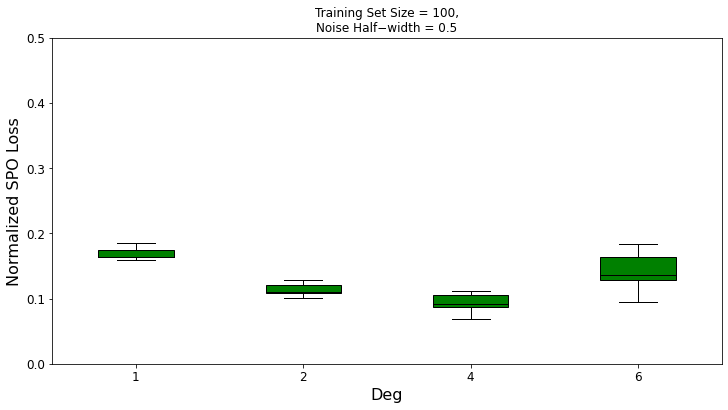

In [15]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df2_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0.5')
plt.show()

In [16]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df2_rf = df2_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 274.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.66it/s]


Normalized SPO Loss: 19.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.90it/s]


Normalized SPO Loss: 14.53%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.90it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.49it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.14it/s]


Normalized SPO Loss: 13.56%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 250.71it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 254.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.67it/s]


Normalized SPO Loss: 16.87%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 274.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.35it/s]


Normalized SPO Loss: 18.70%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 259.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.88it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.96it/s]


Normalized SPO Loss: 13.28%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.07it/s]


Normalized SPO Loss: 13.15%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 271.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 275.09it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.54it/s]


Normalized SPO Loss: 16.94%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.94it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.94it/s]


Normalized SPO Loss: 19.72%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 235.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 276.43it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.29it/s]


Normalized SPO Loss: 15.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 319.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.83it/s]


Normalized SPO Loss: 14.07%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 274.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.29it/s]


Normalized SPO Loss: 20.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 275.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.85it/s]


Normalized SPO Loss: 20.12%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 270.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.77it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.02it/s]


Normalized SPO Loss: 15.80%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 274.70it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 264.80it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.87it/s]


Normalized SPO Loss: 17.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.65it/s]


Normalized SPO Loss: 23.68%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.62it/s]


Normalized SPO Loss: 19.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 248.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 255.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.79it/s]


Normalized SPO Loss: 15.09%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 386.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 420.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.11it/s]


Normalized SPO Loss: 13.26%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.35it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.28it/s]


Normalized SPO Loss: 17.88%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 404.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.26it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.68it/s]


Normalized SPO Loss: 18.75%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 397.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.95it/s]


Normalized SPO Loss: 14.32%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.00it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.46it/s]


Normalized SPO Loss: 13.31%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 351.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.34it/s]


Normalized SPO Loss: 19.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.87it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.65it/s]


Normalized SPO Loss: 19.59%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 439.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.82it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.32it/s]


Normalized SPO Loss: 14.69%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.62it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.44it/s]


Normalized SPO Loss: 13.63%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.15it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.40it/s]


Normalized SPO Loss: 17.92%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 206.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.20it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.02it/s]


Normalized SPO Loss: 18.97%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 382.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.68it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 111.22it/s]


Normalized SPO Loss: 14.46%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 429.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.18it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.28it/s]


Normalized SPO Loss: 14.39%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 402.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.41it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.94it/s]


Normalized SPO Loss: 18.40%



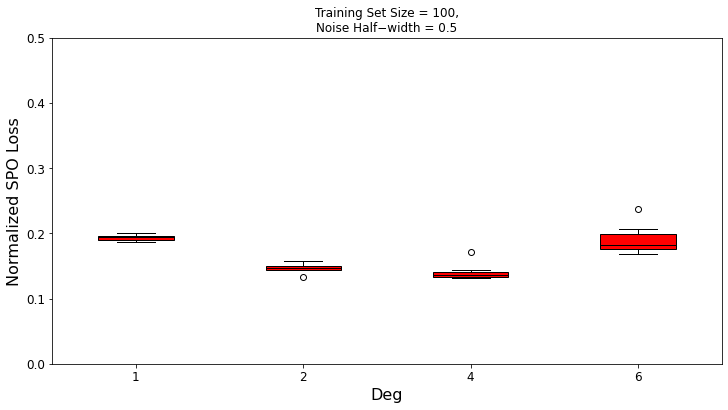

In [17]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df2_rf, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0.5')
plt.show()

### Training Set Size = 1000, Noise Half−width = 0

In [18]:
# set up
n = 1000 # number of data
p = 5 # size of feature
e = 0 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [19]:
# init DataFrame
df3_lr = pd.DataFrame(columns = degs)
df3_rf = pd.DataFrame(columns = degs)

In [20]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df3_lr = df3_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.46it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.60it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.45it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.85it/s]


Normalized SPO Loss: 0.11%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.99it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.24it/s]


Normalized SPO Loss: 1.74%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.41it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.63it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.00it/s]


Normalized SPO Loss: 6.87%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.16it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.55it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.21it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.90it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.59it/s]


Normalized SPO Loss: 1.60%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.96it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.34it/s]


Normalized SPO Loss: 5.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.23it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.76it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.07it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 384.23it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.36it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.13it/s]


Normalized SPO Loss: 0.11%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.82it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.63it/s]


Normalized SPO Loss: 1.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.15it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.23it/s]


Normalized SPO Loss: 7.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 266.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.66it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.39it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 281.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.93it/s]


Normalized SPO Loss: 0.18%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 282.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 222.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.08it/s]


Normalized SPO Loss: 2.54%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.73it/s]


Normalized SPO Loss: 9.03%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.09it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.99it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.18it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.67it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.70it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.91it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.26it/s]


Normalized SPO Loss: 1.55%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.22it/s]


Normalized SPO Loss: 4.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.84it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.93it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.40it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.06it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.11it/s]


Normalized SPO Loss: 0.18%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.88it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.24it/s]


Normalized SPO Loss: 2.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 395.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 382.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.99it/s]


Normalized SPO Loss: 7.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.68it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.88it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.57it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.21it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.54it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.78it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.45it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.04it/s]


Normalized SPO Loss: 1.85%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.55it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.26it/s]


Normalized SPO Loss: 5.36%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 379.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.05it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.31it/s]


Normalized SPO Loss: -0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.70it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.01it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.90it/s]


Normalized SPO Loss: 2.84%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 297.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.18it/s]


Normalized SPO Loss: 9.62%



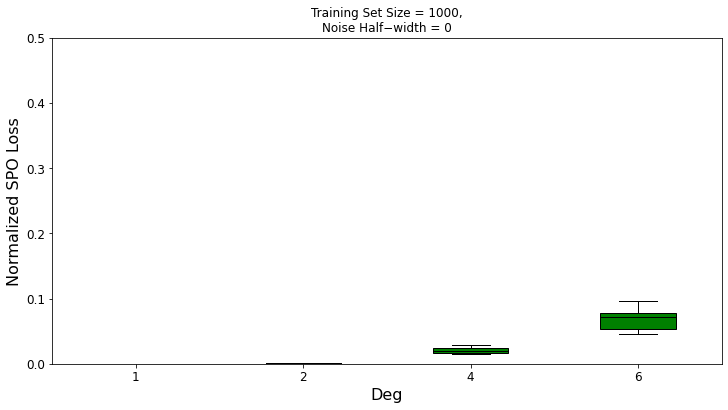

In [21]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df3_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0')
plt.show()

In [22]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df3_rf = df3_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.49it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.24it/s]


Normalized SPO Loss: 0.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.92it/s]


Normalized SPO Loss: 0.44%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.36it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.99it/s]


Normalized SPO Loss: 1.02%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.95it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.63it/s]


Normalized SPO Loss: 2.69%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.31it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.30it/s]


Normalized SPO Loss: 0.37%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.94it/s]


Normalized SPO Loss: 1.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.23it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.19it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.22it/s]


Normalized SPO Loss: 2.83%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 258.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.12it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.22it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.98it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.62it/s]


Normalized SPO Loss: 0.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.11it/s]


Normalized SPO Loss: 1.21%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.49it/s]


Normalized SPO Loss: 2.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 412.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.19it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.04it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.11it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.82it/s]


Normalized SPO Loss: 0.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 396.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.47it/s]


Normalized SPO Loss: 1.10%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.95it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.76it/s]


Normalized SPO Loss: 3.01%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 289.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.12it/s]


Normalized SPO Loss: 0.19%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.31it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.67it/s]


Normalized SPO Loss: 0.54%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.60it/s]


Normalized SPO Loss: 1.57%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 281.06it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.37it/s]


Normalized SPO Loss: 3.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.41it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.82it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.82it/s]


Normalized SPO Loss: 0.18%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.27it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.04it/s]


Normalized SPO Loss: 0.39%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.09it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.42it/s]


Normalized SPO Loss: 1.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.61it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.23it/s]


Normalized SPO Loss: 2.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.85it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.66it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.24it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.56it/s]


Normalized SPO Loss: 0.44%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.71it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.09it/s]


Normalized SPO Loss: 0.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.81it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 365.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.42it/s]


Normalized SPO Loss: 1.64%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.53it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.51it/s]


Normalized SPO Loss: 0.10%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.15it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.46it/s]


Normalized SPO Loss: 0.26%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.49it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.86it/s]


Normalized SPO Loss: 0.71%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.99it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.80it/s]


Normalized SPO Loss: 2.23%



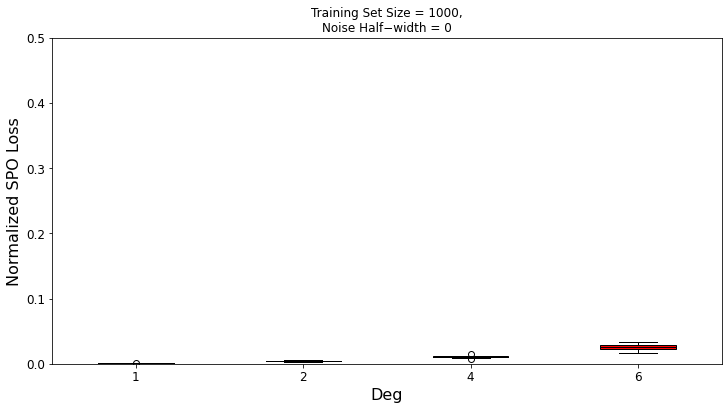

In [23]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df3_rf, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0')
plt.show()

### Training Set Size = 1000, Noise Half−width = 0.5

In [24]:
# set up
n = 1000 # number of data
p = 5 # size of feature
e = 0.5 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [25]:
# init DataFrame
df4_lr = pd.DataFrame(columns = degs)
df4_rf = pd.DataFrame(columns = degs)

In [26]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        lr_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df4_lr = df4_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.94it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.68it/s]


Normalized SPO Loss: 15.76%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.59it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.98it/s]


Normalized SPO Loss: 10.56%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.70it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.87it/s]


Normalized SPO Loss: 8.24%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.59it/s]


Normalized SPO Loss: 12.40%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.35it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.47it/s]


Normalized SPO Loss: 14.77%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 385.85it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.45it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.31it/s]


Normalized SPO Loss: 9.59%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.49it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.39it/s]


Normalized SPO Loss: 7.62%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.14it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.81it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.29it/s]


Normalized SPO Loss: 9.57%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 410.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 389.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.81it/s]


Normalized SPO Loss: 16.19%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 287.72it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.19it/s]


Normalized SPO Loss: 11.69%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.96it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.43it/s]


Normalized SPO Loss: 9.89%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 376.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.35it/s]


Normalized SPO Loss: 14.22%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.62it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.22it/s]


Normalized SPO Loss: 15.73%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.84it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.53it/s]


Normalized SPO Loss: 11.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.41it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.72it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.61it/s]


Normalized SPO Loss: 9.71%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 277.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.01it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.77it/s]


Normalized SPO Loss: 15.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.05it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.86it/s]


Normalized SPO Loss: 16.66%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.96it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.53it/s]


Normalized SPO Loss: 11.91%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.73it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.65it/s]


Normalized SPO Loss: 9.49%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 378.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.46it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.16it/s]


Normalized SPO Loss: 12.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 378.69it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.76it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.79it/s]


Normalized SPO Loss: 16.36%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.87it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.09it/s]


Normalized SPO Loss: 11.34%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.84it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 387.40it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.15it/s]


Normalized SPO Loss: 9.70%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.53it/s]


Normalized SPO Loss: 14.63%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.04it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.43it/s]


Normalized SPO Loss: 15.84%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.72it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.65it/s]


Normalized SPO Loss: 10.76%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 393.03it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.95it/s]


Normalized SPO Loss: 8.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.48it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.29it/s]


Normalized SPO Loss: 11.29%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.38it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.21it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.28it/s]


Normalized SPO Loss: 14.92%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.46it/s]


Normalized SPO Loss: 9.88%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.18it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 297.97it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.53it/s]


Normalized SPO Loss: 8.50%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.29it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.59it/s]


Normalized SPO Loss: 14.49%



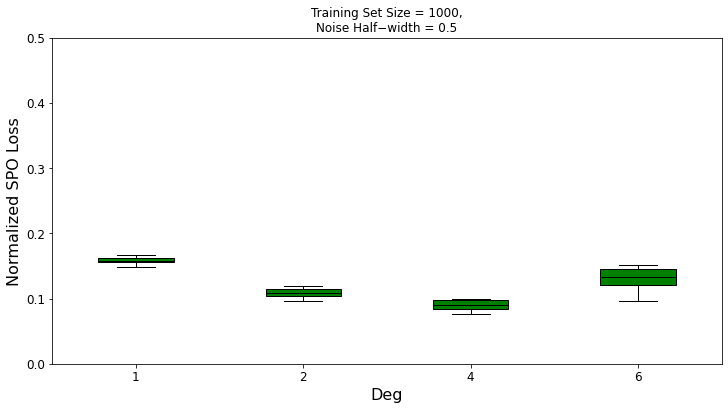

In [27]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df4_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0.5')
plt.show()

In [28]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        x, c = shortestpath.genData(n+1000, p, grid, deg=deg, noise_width=e, seed=i)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        sp_dataset_train = dataset.optDataset(sp_model, x_train, c_train)
        sp_dataset_test = dataset.optDataset(sp_model, x_test, c_test)
        # training
        rf_twostage.fit(sp_dataset_train.x, sp_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(sp_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = sp_dataset_test.c[j]
            z_true_i = sp_dataset_test.z[j,0]
            loss += calUnambSPO(sp_model, c_pred_i, c_true_i, z_true_i)
        loss /= sp_dataset_test.z.sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df4_rf = df4_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.00it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.48it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.99it/s]


Normalized SPO Loss: 17.92%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.09it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.26it/s]


Normalized SPO Loss: 12.03%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.00it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 97.91it/s]


Normalized SPO Loss: 8.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 281.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.18it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.49it/s]


Normalized SPO Loss: 8.27%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.98it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.35it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.03it/s]


Normalized SPO Loss: 17.09%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.15it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.07it/s]


Normalized SPO Loss: 11.28%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.53it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.97it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.66it/s]


Normalized SPO Loss: 7.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.02it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.87it/s]


Normalized SPO Loss: 7.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 389.78it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 401.22it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.11it/s]


Normalized SPO Loss: 17.79%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.00it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.60it/s]


Normalized SPO Loss: 13.08%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.13it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.36it/s]


Normalized SPO Loss: 11.20%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 387.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 381.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.90it/s]


Normalized SPO Loss: 12.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.33it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 375.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.69it/s]


Normalized SPO Loss: 18.38%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.75it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.01it/s]


Normalized SPO Loss: 13.47%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.30it/s]


Normalized SPO Loss: 9.07%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.53it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 377.70it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.63it/s]


Normalized SPO Loss: 9.60%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.06it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.50it/s]


Normalized SPO Loss: 19.31%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.85it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.91it/s]


Normalized SPO Loss: 14.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 396.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.79it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.91it/s]


Normalized SPO Loss: 10.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 379.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.23it/s]


Normalized SPO Loss: 11.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.67it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.41it/s]


Normalized SPO Loss: 18.37%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.43it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.80it/s]


Normalized SPO Loss: 12.42%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 379.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 370.80it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.23it/s]


Normalized SPO Loss: 9.45%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.92it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 93.10it/s]


Normalized SPO Loss: 9.24%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.70it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.35it/s]


Normalized SPO Loss: 17.79%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.83it/s]


Normalized SPO Loss: 12.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.25it/s]


Normalized SPO Loss: 8.55%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.11it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.50it/s]


Normalized SPO Loss: 8.62%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.10it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.64it/s]


Normalized SPO Loss: 16.68%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 297.24it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 260.61it/s]


Evaluate....


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.24it/s]


Normalized SPO Loss: 11.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.28it/s]


Normalized SPO Loss: 7.44%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.00it/s]


Normalized SPO Loss: 7.94%



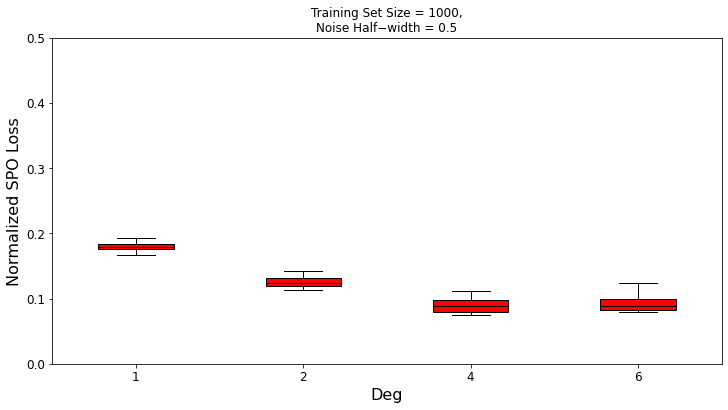

In [29]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df4_rf, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0.5')
plt.show()

## Save File 

In [30]:
df1_lr.to_csv('./res/lr_n100.csv', index=False)
df1_rf.to_csv('./res/rf_n100.csv', index=False)
df2_lr.to_csv('./res/lr_n100_noise.csv', index=False)
df2_rf.to_csv('./res/rf_n100_noise.csv', index=False)
df3_lr.to_csv('./res/lr_n1000.csv', index=False)
df3_rf.to_csv('./res/rf_n1000.csv', index=False)
df4_lr.to_csv('./res/lr_n1000_noise.csv', index=False)
df4_rf.to_csv('./res/rf_n1000_noise.csv', index=False)